In [1]:
import shapefile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [15]:
def canopy_crow_create(infile,outfile,plotsize = 20):    
    fig = plt.figure(figsize=(6,6))
    csv_file = os.path.basename(infile)
    plotID = csv_file.split('.')[0]  # get from csv
    ds = pd.read_csv(infile,encoding='gb2312')
    npoints = len(ds)  # get from the csv file
    
    coods = ds.iloc[:,5:7].values
    print(coods)
    plt.scatter(coods[:,0],coods[:,1])
    theta = np.arange(-np.pi,np.pi,np.pi/50) #必须构建顺时针方向才可以处理
    sf = shapefile.Writer(outfile)
    sf.autoBalance = 1
    sf.field('PlotID','C','10')
    sf.field('TreeID','C','10')
    sf.field('East_West','N',decimal=8)
    sf.field('North_South','N',decimal=8)
    
    
    for i in range(npoints):
        # read a,b
        a = ds.iloc[i,3]#/2.0 # east-west
        b = ds.iloc[i,4]#/2.0  #get from csv, north-south
        if a > 10 or b >10:
            print(plotID)
        treeID = ds.iloc[i,0] # get from csv
        crown_x = a*np.cos(-theta)+coods[i,0] #必须构建顺时针方向才可以处理
        crown_y = b*np.sin(-theta)+coods[i,1]
        plt.plot(crown_x,crown_y)
        lcrown_xy = np.column_stack((crown_x,crown_y)).tolist()
        sf.poly([lcrown_xy])
        sf.record(plotID,treeID,a,b)
    plt.xlabel('E(x)')
    plt.ylabel('E(y)')
    plt.text(-3,23.5,'米')
    plt.text(23,-1.5,'米')
    plt.savefig(r'./输出数据/树冠投影图.png',dpi=300)

[[11.1052999  1.33337  ]
 [15.5511999  8.4483099]
 [ 3.22404   12.5551996]
 [ 9.4088001  1.724    ]
 [ 1.12738    2.61847  ]
 [ 9.1027403  4.4907598]
 [ 7.9523802  7.4126902]
 [ 1.28083   18.6287994]
 [16.093399  10.8924999]
 [ 2.7725999  8.9899397]
 [12.4624996 17.8083992]
 [17.6625996  0.558235 ]
 [ 5.2719898 12.8069   ]
 [ 2.1186199 17.9269009]
 [ 7.1174698 11.3796997]
 [ 5.3183498  2.95105  ]
 [19.9682999  6.92276  ]
 [12.1112003 12.1977997]
 [18.5165997 16.1604996]
 [17.5067005  1.378    ]
 [10.7227001 10.9345999]
 [12.9055004 12.7118998]
 [11.6405001  0.391265 ]
 [ 1.2230901  0.53442  ]
 [13.0902004  6.5057502]
 [ 7.51195    6.0185699]
 [15.3094997  6.0210099]
 [ 6.6721401 14.7740002]
 [ 0.319936   8.2140102]]


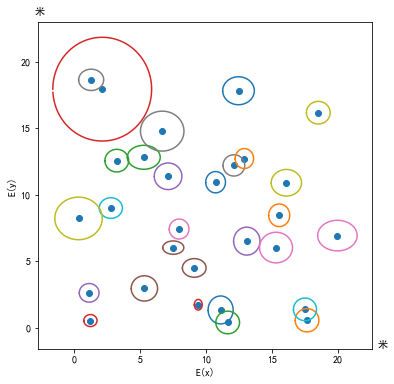

In [16]:
if __name__== '__main__':
    file_path = './使用数据'
    out_path = './输出数据'
    csv_file = 'sample_plot.txt'
    infile = os.path.join(file_path,csv_file)
    plotID = csv_file.split('.')[0]  # get from csv
    outfile = os.path.join(out_path,plotID+'_2.shp')
    canopy_crow_create(infile,outfile,20)